Exact period: 9.673596609249161
Numerical x_max: 2.00000000 (Exact: 2)
Numerical x_min: -0.67326177 (Exact: -2/3 ≈ -0.6667)
Maximum energy drift: 3.87086230e-03


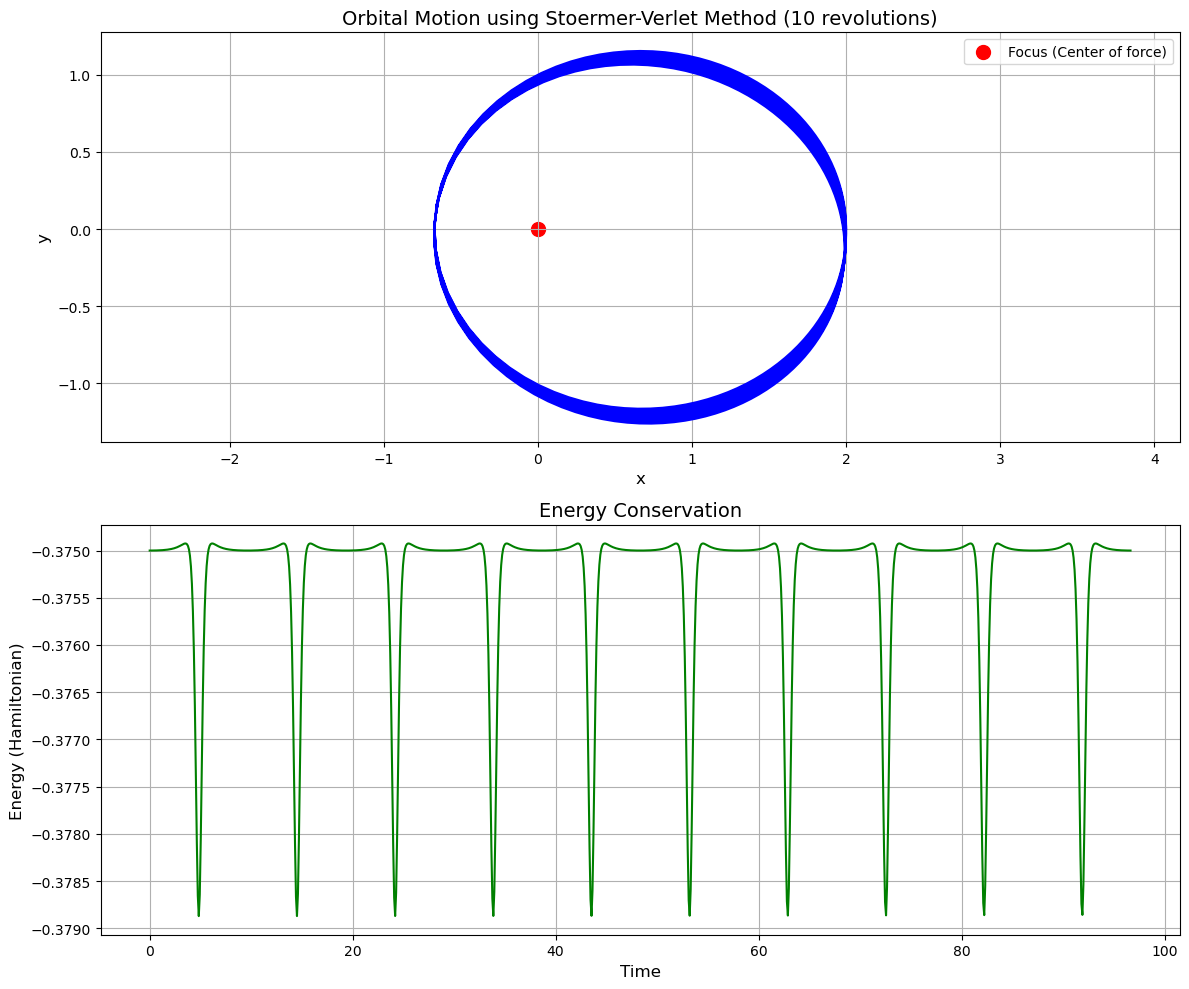

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def hamiltonian(u, v, x, y):
    T = 0.5 * (u**2 + v**2)
    U = -1 / np.sqrt(x**2 + y**2)
    return T + U

def verlet_step(u, v, x, y, h):
    u1 = u - h/2 * (x/(x**2 + y**2)**(3/2))
    v1 = v - h/2 * (y/(x**2 + y**2)**(3/2))
    x1 = x + h * u1
    y1 = y + h * v1
    u2 = u1 - h/2 * (x1/(x1**2 + y1**2)**(3/2))
    v2 = v1 - h/2 * (y1/(x1**2 + y1**2)**(3/2))
    return u2, v2, x1, y1

u0, v0 = 0, 0.5
x0, y0 = 2, 0
T_exact = 2 * np.pi * (4/3)**(3/2)
print(f"Exact period: {T_exact}")
h = 0.01 * T_exact
n_steps = int(10 * T_exact / h)
u = np.zeros(n_steps + 1)
v = np.zeros(n_steps + 1)
x = np.zeros(n_steps + 1)
y = np.zeros(n_steps + 1)
energy = np.zeros(n_steps + 1)
time = np.zeros(n_steps + 1)
u[0], v[0] = u0, v0
x[0], y[0] = x0, y0
energy[0] = hamiltonian(u0, v0, x0, y0)
for i in range(n_steps):
    u[i+1], v[i+1], x[i+1], y[i+1] = verlet_step(u[i], v[i], x[i], y[i], h)
    energy[i+1] = hamiltonian(u[i+1], v[i+1], x[i+1], y[i+1])
    time[i+1] = time[i] + h
plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
plt.plot(x, y, 'b-', linewidth=1.5)
plt.scatter(0, 0, color='red', s=100, marker='o', label='Focus (Center of force)')
plt.grid(True)
plt.axis('equal')
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Orbital Motion using Stoermer-Verlet Method (10 revolutions)', fontsize=14)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time, energy, 'g-', linewidth=1.5)
plt.grid(True)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Energy (Hamiltonian)', fontsize=12)
plt.title('Energy Conservation', fontsize=14)

x_max = np.max(x)
x_min = np.min(x)
print(f"Numerical x_max: {x_max:.8f} (Exact: 2)")
print(f"Numerical x_min: {x_min:.8f} (Exact: -2/3 ≈ -0.6667)")

energy_drift = np.max(np.abs(energy - energy[0]))
print(f"Maximum energy drift: {energy_drift:.8e}")

plt.tight_layout()
plt.savefig('gravitational_orbit.png')
plt.show()

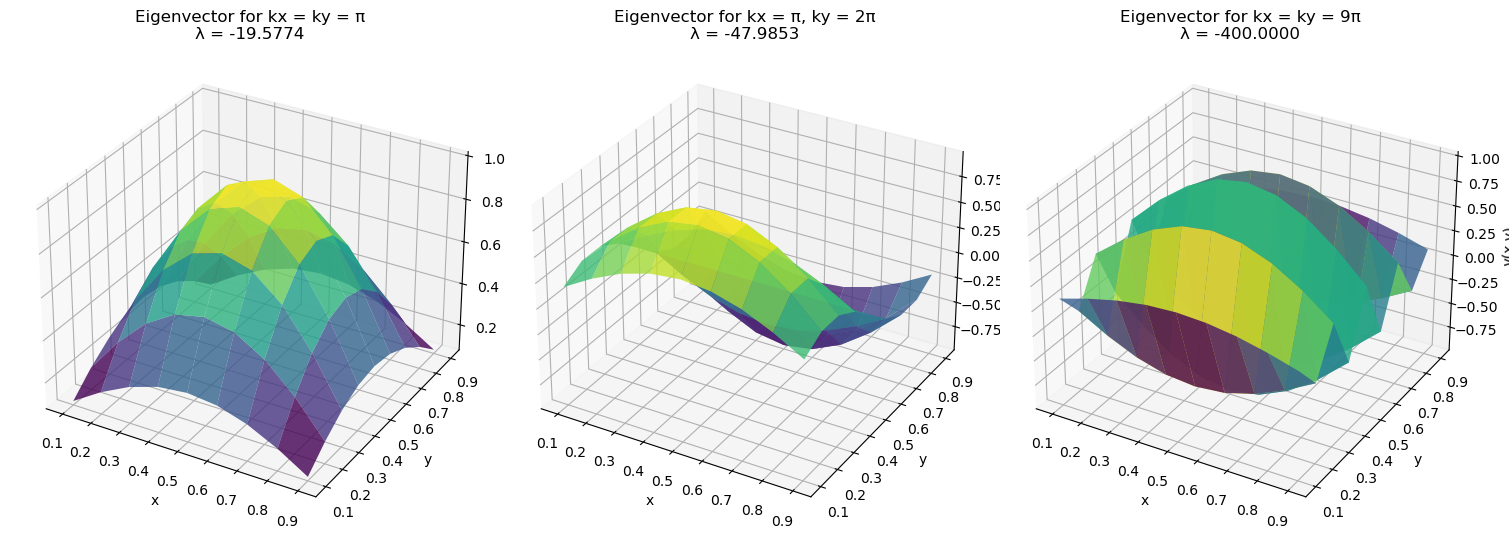

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def compute_eigenvalue(kx, ky, h):
    return (2/h**2) * (np.cos(kx*h) + np.cos(ky*h) - 2)

def compute_eigenvector(kx, ky, J):
    h = 1/J
    x = np.linspace(h, 1-h, J-1)
    y = np.linspace(h, 1-h, J-1)
    X, Y = np.meshgrid(x, y)
    v = np.sin(kx * X) * np.sin(ky * Y)
    return X, Y, v

def plot_eigenvector(kx, ky, J, ax, title):
    X, Y, v = compute_eigenvector(kx, ky, J)
    surf = ax.plot_surface(X, Y, v, cmap='viridis', edgecolor='none', alpha=0.8)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('v(x,y)')
    ax.set_title(title)
    return surf

J = 10
h = 1/J
pi = np.pi
# smallest_kx = pi
# smallest_ky = pi
# smallest_lambda = compute_eigenvalue(smallest_kx, smallest_ky, h)
# largest_kx = (J-1)*pi
# largest_ky = (J-1)*pi
# largest_lambda = compute_eigenvalue(largest_kx, largest_ky, h)
# print(f"Smallest eigenvalue: {smallest_lambda:.6f} at kx = {smallest_kx:.6f}, ky = {smallest_ky:.6f}")
# print(f"Largest eigenvalue: {largest_lambda:.6f} at kx = {largest_kx:.6f}, ky = {largest_ky:.6f}")

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
plot_eigenvector(pi, pi, J, ax1, f'Eigenvector for kx = ky = π\nλ = {compute_eigenvalue(pi, pi, h):.4f}')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
plot_eigenvector(pi, 2*pi, J, ax2, f'Eigenvector for kx = π, ky = 2π\nλ = {compute_eigenvalue(pi, 2*pi, h):.4f}')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
plot_eigenvector(pi, (J-1)*pi, J, ax3, f'Eigenvector for kx = ky = {J-1}π\nλ = {compute_eigenvalue(pi, (J-1)*pi, h):.4f}')
plt.tight_layout()
plt.savefig('poisson_eigenvectors.png')
plt.show()